In [41]:
# Dependencies
import requests
from pprint import pprint
#from config_om import api_key
#from config_ab import api_key
#from config_kr import bls_key
from config_fr import g_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


#url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
#url

In [42]:
# Import source data
glassdoor_file = pd.read_csv("./remote_resources/glassdoor/glassdoor.csv")
stackoverflow_file = pd.read_csv("./remote_resources/stackoverflow/2019-survey/survey_results_public_prepped.csv")
h1b1_visas_file = pd.read_csv("./remote_resources/h1b-visas/h1b18_prepped.csv", encoding= "UTF-8")


In [43]:
# Prepare Stack Overflow Survey data for analysis (Filtering to a subset of Columns)
stack_overflow_filtered_columns = stackoverflow_file[['MainBranch','Hobbyist','Employment','Country','Student','EdLevel','EduOther','OrgSize','DevType','YearsCode','YearsCodePro','CareerSat','JobSat','CompTotal','ConvertedComp','WorkWeekHrs','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','Age','Gender','Ethnicity', 'DataScienceDomain'
]]

# Isolate US based surveys, with a Data Science Domain for which the records are complete (i.e. 'NaNs' removed)
stack_overflow_filtered_USOnly = stack_overflow_filtered_columns.loc[stack_overflow_filtered_columns['Country'] == 'United States']
stack_overflow_filtered_DataScienceDomain_USOnly = stack_overflow_filtered_USOnly.loc[stack_overflow_filtered_USOnly['DataScienceDomain'] == True]
stack_overflow_df = pd.DataFrame(stack_overflow_filtered_DataScienceDomain_USOnly.dropna())
stack_overflow_df.count()

MainBranch                1897
Hobbyist                  1897
Employment                1897
Country                   1897
Student                   1897
EdLevel                   1897
EduOther                  1897
OrgSize                   1897
DevType                   1897
YearsCode                 1897
YearsCodePro              1897
CareerSat                 1897
JobSat                    1897
CompTotal                 1897
ConvertedComp             1897
WorkWeekHrs               1897
LanguageWorkedWith        1897
LanguageDesireNextYear    1897
DatabaseWorkedWith        1897
DatabaseDesireNextYear    1897
PlatformWorkedWith        1897
PlatformDesireNextYear    1897
Age                       1897
Gender                    1897
Ethnicity                 1897
DataScienceDomain         1897
dtype: int64

In [44]:
# Define Categories for Analysis
# group by education level
so_groupby_edu = stack_overflow_df.groupby('EdLevel') 

# group by gender
so_groupby_gender = stack_overflow_df.groupby('Gender')

so_groupby_devtype = stack_overflow_df.groupby('DevType')

so_groupby_age = stack_overflow_df.groupby('Age')

so_groupby_emp = stack_overflow_df.groupby('Employment')

so_groupby_mainbranch = stack_overflow_df.groupby('MainBranch')

so_groupby_degree_DevType = stack_overflow_df.groupby(['EdLevel','DevType'] ).agg({'Age': ['count']})

#print(glassdoor_file.head())
#print(stackoverflow_file.head())

In [45]:
print(stack_overflow_df['EdLevel'].unique())
print("-----------------------------------------------"*2)
print(stack_overflow_df['DevType'].unique())

['Master’s degree (MA, MS, M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree' 'Professional degree (JD, MD, etc.)'
 'I never completed any formal education' 'Primary/elementary school']
----------------------------------------------------------------------------------------------
['Data or business analyst;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Senior executive/VP;System administrator'
 'Data or business analyst;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;DevOps specialist;System administrator'
 'Developer, 

In [55]:
h1b1_visas_file_filtered_columns = h1b1_visas_file[['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'JOB_TITLE', 'SOC_NAME', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'WAGE_RATE_OF_PAY_FROM','Domain', 'Role' ]]
h1b1_visas_file_certified = h1b1_visas_file_filtered_columns.loc[h1b1_visas_file_filtered_columns['CASE_STATUS']=='CERTIFIED']
h1b1_visas_file_certified_dropna = h1b1_visas_file_certified.dropna()
h1b1_visas_file_certified_year = h1b1_visas_file_certified_dropna.loc[h1b1_visas_file_certified_dropna['PW_UNIT_OF_PAY'] == 'Year']

In [ ]:
#query = "data science"
#query
#query_url = url + "api-key=" + api_key + "&q=" + query
#query_url

In [56]:
h1b1_visas_data_science = pd.DataFrame(h1b1_visas_file_certified_year.loc[h1b1_visas_file_certified_year['Domain'] == 'Data Science'])
#df["A"] = pd.to_numeric(df["A"], downcast="float")
h1b1_visas_data_science['PREVAILING_WAGE'] = pd.to_numeric(h1b1_visas_data_science['PREVAILING_WAGE'], downcast = 'float', errors ='ignore')
h1b1_visas_data_science

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,Domain,Role
129,CERTIFIED,2/28/2018,3/6/2018,MOTOROLA MOBILITY LLC,CHICAGO,IL,60654,"ENGINEER, MACHINE LEARNING AND AI","ELECTRONICS ENGINEERS, EXCEPT COMPUTER",Y,79784.0,Year,79784.0,Data Science,Machine Learning
173,CERTIFIED,3/7/2018,3/13/2018,SAPPHIRE IT SERVICES INC,STAFFORD,TX,77477,DATA INTEGRATION PROGRAMMER,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,90646.0,Year,91200.0,Data Science,Data Integration
232,CERTIFIED,3/2/2018,3/8/2018,FEDERAL HOME LOAN MORTGAGE CO.,MCLEAN,VA,22102,QUANTITATIVE ANALYTICS MANAGER,FINANCIAL MANAGERS,Y,113400.0,Year,113400.0,Data Science,Analytics
249,CERTIFIED,3/8/2018,3/14/2018,"EXLSERVICE.COM, LLC",NEW YORK,NY,10017,SENIOR ANALYTICS CONSULTANT,STATISTICIANS,Y,83400.0,Year,83400.0,Data Science,Analytics
315,CERTIFIED,2/27/2018,3/5/2018,"HOTWIRE, INC.",SAN FRANCISCO,CA,94104,BUSINESS INTELLIGENCE MANAGER (15-1199.08),"COMPUTER OCCUPATIONS, ALL OTHER",Y,111847.0,Year,111847.0,Data Science,Business Intelligence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653733,CERTIFIED,3/1/2018,3/7/2018,"INFOTREE SERVICE, INC.",PLYMOUTH,MI,48170,DATA ANALYST III,OPERATIONS RESEARCH ANALYSTS,Y,67746.0,Year,67746.0,Data Science,Data Analyst
653824,CERTIFIED,3/29/2018,4/4/2018,VISA U.S.A. INC.,FOSTER CITY,CA,94404,"ANALYST, ANALYTICS AND DATA PRODUCTS",OPERATIONS RESEARCH ANALYSTS,Y,82763.0,Year,82763.0,Data Science,Analytics
653885,CERTIFIED,2/22/2018,3/1/2018,ACCENTURE LLP,CHICAGO,IL,60601,FUNCTIONAL AND INDUSTRY ANALYTICS MANAGER,COMPUTER AND INFORMATION SYSTEMS MANAGERS,Y,145184.0,Year,145184.0,Data Science,Analytics
654347,CERTIFIED,10/27/2017,11/2/2017,VISUAL CONSULTANTS INC,NEW HOPE,MN,55428,ETL/BIG DATA ANALYST,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,78624.0,Year,92019.0,Data Science,Data Analyst


In [57]:
grp_data_science_role = h1b1_visas_data_science.groupby('Role')
grp_data_science_state = h1b1_visas_data_science.groupby('EMPLOYER_STATE')
grp_data_science_state_and_role = h1b1_visas_data_science.groupby(['EMPLOYER_STATE', 'Role'])


In [85]:
h1b1_avg_salary_by_state_and_role = pd.DataFrame(grp_data_science_state_and_role['PREVAILING_WAGE'].mean()).reset_index()


In [84]:
h1b1_avg_salary_ny = h1b1_avg_salary_by_state_and_role.loc[h1b1_avg_salary_by_state_and_role['EMPLOYER_STATE'] == 'NY']
h1b1_avg_salary_nj = h1b1_avg_salary_by_state_and_role.loc[h1b1_avg_salary_by_state_and_role['EMPLOYER_STATE'] == 'NJ']
h1b1_avg_salary_ca = h1b1_avg_salary_by_state_and_role.loc[h1b1_avg_salary_by_state_and_role['EMPLOYER_STATE'] == 'CA']


In [87]:
roles = []
for role in (h1b1_avg_salary_ny['Role']):
    roles.append(role)
roles

['Analytics',
 'Business Intelligence',
 'Data Analyst',
 'Data Engineer',
 'Data Integration',
 'Data Risk Analyst',
 'Data Scientist',
 'Data Visualization',
 'Machine Learning']

In [88]:
salary = []
for sal in (h1b1_avg_salary_ny['PREVAILING_WAGE']):
    salary.append(sal)


Text(0, 0.5, 'Average Salary')

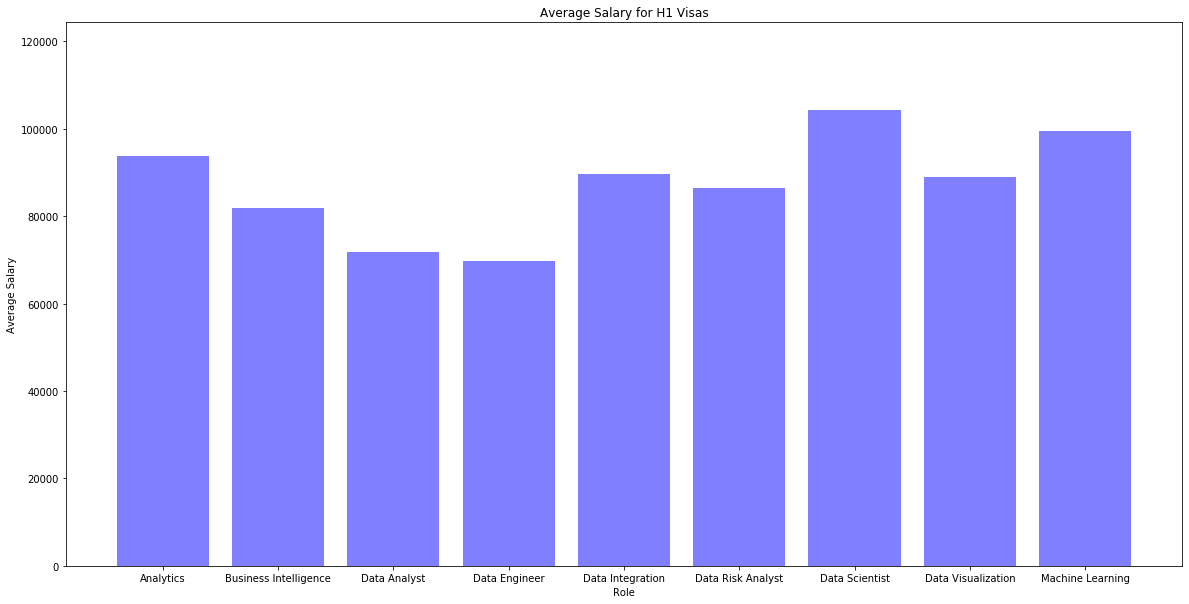

In [115]:
x_axis = np.arange(len(roles))
plt.figure(figsize=(20,10))
plt.bar(x_axis, salary, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, roles, rotation="horizontal")
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(salary)+20000)

# Give our chart some labels and a tile
plt.title("Average Salary for H1 Visas")
plt.xlabel("Role")
plt.ylabel("Average Salary")

In [86]:
h1b1_counts_by_state_and_role = pd.DataFrame(grp_data_science_state_and_role['PREVAILING_WAGE'].count()).reset_index()


In [67]:
h1b1_counts_by_state_and_role_ny = h1b1_counts_by_state_and_role.loc[h1b1_counts_by_state_and_role['EMPLOYER_STATE'] == 'NY']
h1b1_counts_by_state_and_role_nj = h1b1_counts_by_state_and_role.loc[h1b1_counts_by_state_and_role['EMPLOYER_STATE'] == 'NJ']
h1b1_counts_by_state_and_role_ca = h1b1_counts_by_state_and_role.loc[h1b1_counts_by_state_and_role['EMPLOYER_STATE'] == 'CA']

In [78]:
roles = []
for role in (h1b1_counts_by_state_and_role_ny['Role']):
    roles.append(role)
roles



['Analytics',
 'Business Intelligence',
 'Data Analyst',
 'Data Engineer',
 'Data Integration',
 'Data Risk Analyst',
 'Data Scientist',
 'Data Visualization',
 'Machine Learning']

In [79]:
counts = []
for count in (h1b1_counts_by_state_and_role_ny['PREVAILING_WAGE']):
    counts.append(count)
counts

[397, 151, 219, 1, 14, 81, 47, 16, 35]

Text(0, 0.5, 'Number of H1 Visas')

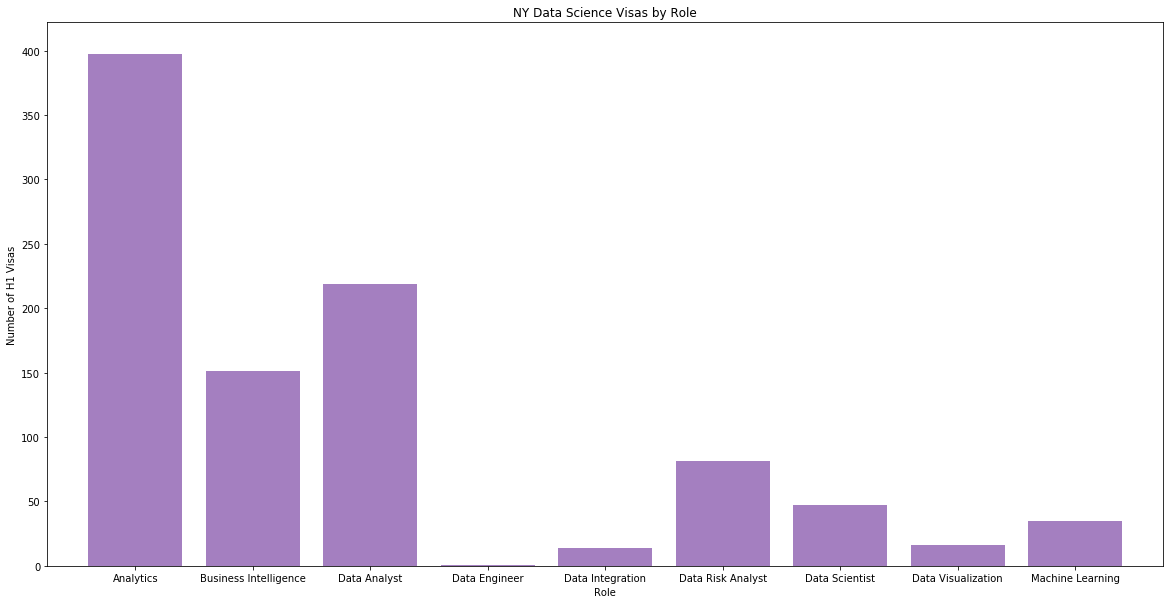

In [120]:
x_axis = np.arange(len(roles))
plt.figure(figsize=(20,10))
plt.bar(x_axis, counts, color='indigo', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, roles)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(counts)+25)

# Give our chart some labels and a tile
plt.title("NY Data Science Visas by Role")
plt.xlabel("Role")
plt.ylabel("Number of H1 Visas")

In [ ]:
#articles = requests.get(query_url).json()
#articles

In [ ]:
#articles_list = articles["response"]["docs"]
#pprint(articles_list)

In [ ]:
print("Your Reading List")
for article in articles_list:
    print(article["web_url"])